In [2]:
# Processes output file generated by csv like so:
# collectl -oT -scC -p inucs001-osd-compute-1-20180905-000000.raw.gz -P --from 14:00 --thru 21:00 -P > inucs001-osd-compute-1-20180905-000000_cpu_collectl.csv
#

import re
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.backends.backend_pdf


# Replaces "Date Time" with DateTime so pandas isn't confused
def fix_date_time(file_name):
    with open(file_name, 'r') as f:
        content = f.read()
    if re.search('Date Time', content):
        new_content = content.replace('Date Time', 'DateTime')
        f = open(file_name, 'w')
        f.write(new_content)

input_csv_dir = 'cpu_analysis'
input_csv = 'inucs001-osd-compute-2-20180905-000000_cpu_collectl.csv'
fix_date_time(input_csv_dir + '/' + input_csv)

In [3]:
df = pd.read_csv(input_csv_dir + '/' + input_csv, delimiter=" ")
df['timestamp'] = pd.to_datetime(df['#DateTime'])
df = df.set_index('timestamp')
df.head()
df["[CPU]Intrpt/sec"].mean()


127525.99008330028

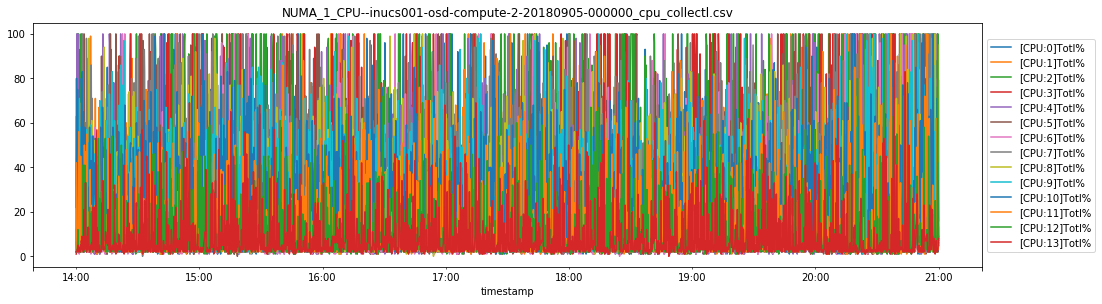

In [3]:
# Plt Numa 1
title = 'NUMA_1_CPU--' + input_csv
df.loc[:,[
    '[CPU:0]Totl%', 
    '[CPU:1]Totl%',
    '[CPU:2]Totl%',
    '[CPU:3]Totl%',
    '[CPU:4]Totl%',
    '[CPU:5]Totl%',
    '[CPU:6]Totl%',
    '[CPU:7]Totl%',
    '[CPU:8]Totl%',
    '[CPU:9]Totl%',
    '[CPU:10]Totl%',
    '[CPU:11]Totl%',
    '[CPU:12]Totl%',    
    '[CPU:13]Totl%',    
]].plot.line(figsize=(17,4.5), legend='reverse')
plt.title(title, color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(title + '.pdf')

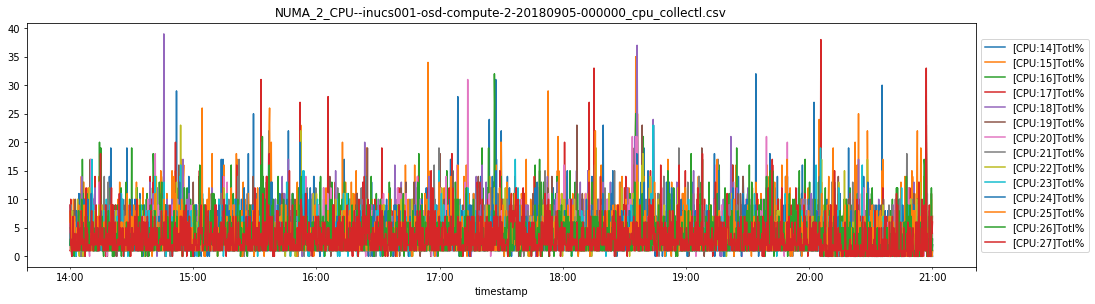

In [4]:
# Plt Numa 2
title = 'NUMA_2_CPU--' + input_csv
df.loc[:,[
    '[CPU:14]Totl%', 
    '[CPU:15]Totl%',
    '[CPU:16]Totl%',
    '[CPU:17]Totl%',
    '[CPU:18]Totl%',
    '[CPU:19]Totl%',
    '[CPU:20]Totl%',
    '[CPU:21]Totl%',
    '[CPU:22]Totl%',
    '[CPU:23]Totl%',
    '[CPU:24]Totl%',
    '[CPU:25]Totl%',
    '[CPU:26]Totl%',    
    '[CPU:27]Totl%',    
]].plot.line(figsize=(17,4.5), legend='reverse')
plt.title(title, color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(title + '.pdf')

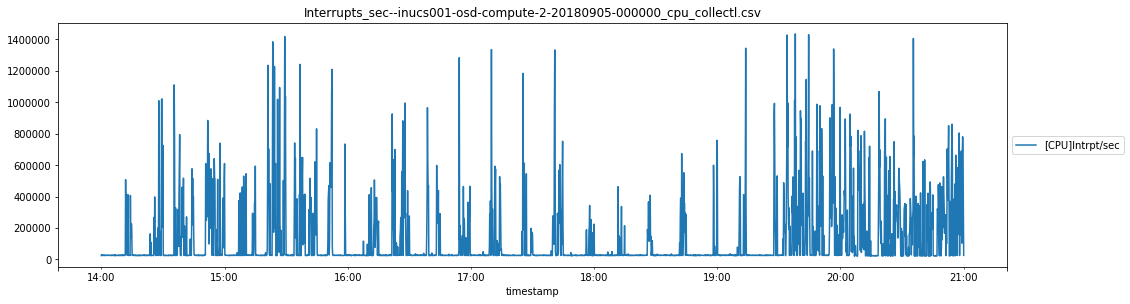

In [5]:
# Plt Numa 2
title = 'Interrupts_sec--' + input_csv
df.loc[:,[
    '[CPU]Intrpt/sec', 
]].plot.line(figsize=(17,4.5), legend='reverse')
plt.title(title, color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(title + '.pdf')

In [6]:
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
for fig in range(1, plt.gcf().number + 1 ): 
    print(fig)
    #pdf.savefig( fig )
pdf.close()

1


<Figure size 432x288 with 0 Axes>